In [1]:
%pip install -r ../requirements.txt

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

2025-01-26 16:59:25.038772: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737921565.104734    3679 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737921565.126177    3679 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-26 16:59:25.278773: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def get_data():
    #TODO CRIAR A FUNÇÃO QUE BAIXA OS DADOS DO WANDB
    data = pd.read_csv('../results/balanced.csv')
    return data

In [4]:
def vectorize_data(data):
    vectorizer = TfidfVectorizer(max_features=5000)
    X_tfidf = vectorizer.fit_transform(data).toarray()
    joblib.dump(vectorizer, '../models/vectorizer.pkl')
    return X_tfidf

In [5]:
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(5000,)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])


    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

    model.summary()
    return model

In [6]:
def train_model():
    df = get_data()

    X_Tfidf = vectorize_data(df['clean_text'])
    X_train, X_test, y_train, y_test = train_test_split(X_Tfidf, df['label'], test_size=0.2, random_state=42)
    model = create_model()

    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred_classes)

    return model, cm

In [7]:
model, cm = train_model()

/home/gabs/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-26 16:59:37.771377: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,609 (2.49 MB)

 Trainable params: 652,609 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

2025-01-26 16:59:41.801555: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 706280000 exceeds 10% of free system memory.


Epoch 1/10
1099/1104 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9348 - loss: 0.1396

2025-01-26 16:59:53.082820: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 176580000 exceeds 10% of free system memory.


1104/1104 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9350 - loss: 0.1392 - val_accuracy: 0.9882 - val_loss: 0.0355
Epoch 2/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9947 - loss: 0.0167 - val_accuracy: 0.9881 - val_loss: 0.0383
Epoch 3/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9974 - loss: 0.0085 - val_accuracy: 0.9890 - val_loss: 0.0435
Epoch 4/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9982 - loss: 0.0054 - val_accuracy: 0.9890 - val_loss: 0.0561
Epoch 5/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9985 - loss: 0.0031 - val_accuracy: 0.9879 - val_loss: 0.0672
Epoch 6/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9991 - loss: 0.0028 - val_accuracy: 0.9880 - val_loss: 0.0579
Epoch 7/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9990 - loss: 0.0029 - val_accuracy: 0.9887 - val_loss: 0.0611
Epoch 8/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9992 - loss: 0.0022 - val_accurac

2025-01-26 17:01:04.421940: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 176580000 exceeds 10% of free system memory.


276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


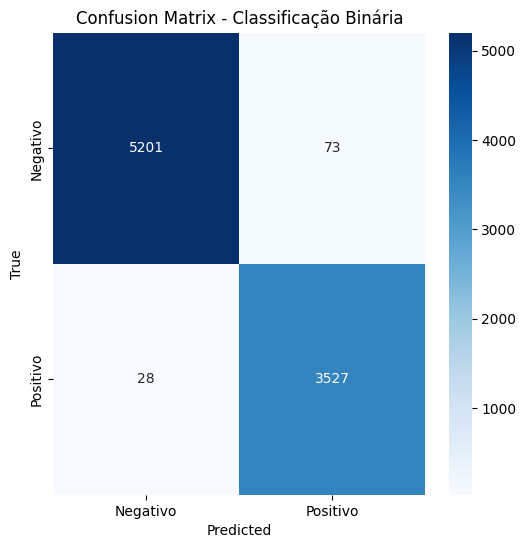

In [8]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Classificação Binária')
plt.show()


In [9]:
# data = get_data()
# print(data.shape)
# vec = vectorize_data(data["clean_text"])
# print(vec.shape)
# X_train, X_test, y_train, y_test = train_test_split(vec, data['label'], test_size=0.2, random_state=42)
# print(f"X_train shape: {X_train.shape}")
# print(f"X_test shape: {X_test.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"y_test shape: {y_test.shape}")

In [10]:
joblib.dump(model, '../models/modelv2.pkl')

['../models/modelv2.pkl']